In [75]:
import numpy as np
import pandas as pd
import os
import pdb
import math
import matplotlib.pyplot as plta
import pylab
import matplotlib.animation as animation
from scipy.spatial import distance
from scipy.spatial.distance import euclidean
from mpl_toolkits.mplot3d import Axes3D
def distance(p0, p1):
    return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2 +(p0[2] - p1[2])**2  )
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy
def midpoint(x1, y1, z1, x2, y2, z2):
    return ((x1 + x2)/2, (y1 + y2)/2, (z1 + z2)/2)


# Open up water peaks 

In [76]:
import pandas as pd
colspecs_pdb = [(0, 6), (6, 11), (12, 16), (16, 17), (17, 20), (21, 22), (22, 26),
            (26, 27), (30, 38), (38, 46), (46, 54), (54, 60), (60, 66), (76, 78),
            (78, 80)]


names_pdb = ['ATOM', 'serial', 'name', 'altloc', 'resname', 'chainid', 'resseq',
         'icode', 'x', 'y', 'z', 'occupancy', 'tempfactor', 'element', 'charge']

pdb_path = '/Users/yyk_lab/Downloads/peaks_p212121_55ns_SOL_3sig.pdb'
peaks = pd.read_fwf(pdb_path, names=names_pdb, colspecs=colspecs_pdb,skiprows=4)
peaks_in_roi = peaks.copy()
peaks

,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,z,occupancy,tempfactor,element,charge
0,ATOM,5263.0,O,NaN,HOH,X,1.0,NaN,29.424,42.669,9.577,11.03,11.03,O,NaN
1,ATOM,11281.0,O,NaN,HOH,X,2.0,NaN,88.206,68.772,-9.577,11.03,11.03,O,NaN
2,ATOM,8366.0,O,NaN,HOH,X,3.0,NaN,60.157,-29.525,2.446,11.01,11.01,O,NaN
3,ATOM,2194.0,O,NaN,HOH,X,4.0,NaN,-2.913,70.665,36.875,10.83,10.83,O,NaN
4,ATOM,7935.0,O,NaN,HOH,X,5.0,NaN,55.868,40.776,-36.875,10.83,10.83,O,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15857,ATOM,11378.0,O,NaN,HOH,Y,5859.0,NaN,89.359,73.520,-0.056,3.05,3.05,O,NaN
15858,ATOM,5350.0,O,NaN,HOH,Y,5860.0,NaN,30.577,37.921,0.056,3.05,3.05,O,NaN
15859,ATOM,189.0,O,NaN,HOH,Y,5861.0,NaN,-25.149,-5.217,19.629,3.05,3.05,O,NaN
15860,ATOM,189.0,O,NaN,HOH,Y,5862.0,NaN,92.414,-5.217,19.629,3.05,3.05,O,NaN


# Load up water channel bounds

In [87]:
chain='g'
import csv
# read .dat to a list of lists
datContent = [i.strip().split() for i in open("/Users/yyk_lab/Downloads/Cl.dat").readlines()]

# write it as a new CSV file
with open("./file.csv", 'w') as f:
    writer = csv.writer(f)
    writer.writerows(datContent)
names_csv = ['Water', 'Atom_1', 'Res_1',  'Chain_1', 'Resnum_1','comma', 'Atom_2', 'Res_2', 'Chain_2','Resnum_2']
file_csv = pd.read_csv('file.csv', names=names_csv)
file_csv['Water']= file_csv['Water'].str.strip(',')
file_csv['Chain_2']
if chain =='g':
    file_csv['Chain_1']= file_csv['Chain_1'].str.lower()
    file_csv['Chain_2']= file_csv['Chain_2'].str.lower()
file_csv

,Water,Atom_1,Res_1,Chain_1,Resnum_1,comma,Atom_2,Res_2,Chain_2,Resnum_2
0,21,OD1,ASP,a,61,",",NZ,LYS,d,317
1,40,OE2,GLU,d,312,",",OD2,ASP,a,61
2,42,OE1,GLU,a,65,",",N,ARG,a,334
3,119,CD,GLU,a,65,",",C,ASP,o,158
4,117,O,PRO,d,309,",",CG,GLU,a,65
5,121,NH2,ARG,o,152,",",O,GLU,d,310
6,125,O,PRO,d,309,",",OD1,ASP,o,224
7,126,OE1,GLU,d,310,",",NH2,ARG,o,152
8,140,O,ARG,a,64,",",CG,PRO,o,117
9,143,CG,PRO,o,117,",",OH,TYR,a,107


# Get boundaries along channel, and then get dataframe of XTAL waters

In [88]:
gro_path = '/Users/yyk_lab/Downloads/0F.pdb_fittedto55all.pdb'
allrois=[]

reference = pd.read_fwf(gro_path, names=names_pdb, colspecs=colspecs_pdb, skiprows=4)

reference

reference_bound_1 = []
reference_bound_2 = []

for i,row in file_csv.iterrows():
    reference_bound_1.append(reference[(reference['resname']==file_csv['Res_1'].iloc[i]) & (reference['name']==file_csv['Atom_1'].iloc[i]) &(reference['chainid']==file_csv['Chain_1'].iloc[i]) & (reference['resseq']==file_csv['Resnum_1'].iloc[i])])
    reference_bound_2.append(reference[(reference['resname']==file_csv['Res_2'].iloc[i]) & (reference['name']==file_csv['Atom_2'].iloc[i]) &(reference['chainid']==file_csv['Chain_2'].iloc[i]) & (reference['resseq']==file_csv['Resnum_2'].iloc[i])])
    roi=3.5
    if ((file_csv['Water'].iloc[i] == '40') or (file_csv['Water'].iloc[i] == '121') or (file_csv['Water'].iloc[i] == '24') or  (file_csv['Water'].iloc[i] == '61')):  
        print('Update ROI for water', file_csv['Water'].iloc[i])
        roi = 5
    allrois.append(roi)
    
ref2=reference[(reference['resname']=='OOO')]
df =ref2
df #dataframe of xtal waters 

Update ROI for water 40
Update ROI for water 121
Update ROI for water 24
Update ROI for water 61


,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,z,occupancy,tempfactor,element,charge
16552,HETATM,16547.0,O,NaN,OOO,G,1.0,NaN,65.040,58.188,50.009,1.00,24.85,O,NaN
16553,HETATM,16548.0,O,NaN,OOO,G,2.0,NaN,19.655,54.694,51.414,1.00,35.38,O,NaN
16554,HETATM,16549.0,O,NaN,OOO,G,3.0,NaN,41.234,28.788,37.875,1.00,24.88,O,NaN
16555,HETATM,16550.0,O,NaN,OOO,G,4.0,NaN,34.385,54.734,27.038,1.00,28.43,O,NaN
16556,HETATM,16551.0,O,NaN,OOO,G,5.0,NaN,96.070,66.291,58.316,1.00,36.18,O,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43124,HETATM,43099.0,O,NaN,OOO,g,136.0,NaN,57.162,-11.375,30.860,1.00,25.35,O,NaN
43125,HETATM,43100.0,O,NaN,OOO,g,137.0,NaN,57.999,-9.217,28.423,1.00,25.65,O,NaN
43126,HETATM,43101.0,O,NaN,OOO,g,138.0,NaN,49.000,-11.404,28.794,1.00,26.49,O,NaN
43127,HETATM,43102.0,O,NaN,OOO,g,141.0,NaN,32.509,-7.885,43.087,1.00,35.09,O,NaN


## Make list of waters found in the defined channel

In [89]:
ref_waters = []

reference_midpt=pd.DataFrame(columns=['Water','x','y','z'],dtype=object)
reference_midpt['Water'] = file_csv['Water']
for i,rew in file_csv.iterrows():
    mid= midpoint(reference_bound_1[i]['x'].values[0],reference_bound_1[i]['y'].values[0],reference_bound_1[i]['z'].values[0],reference_bound_2[i]['x'].values[0],reference_bound_2[i]['y'].values[0],reference_bound_2[i]['z'].values[0])
    reference_midpt['x'][i] =mid[0]
    reference_midpt['y'][i] =mid[1]
    reference_midpt['z'][i] =mid[2]
for n,rew in df.iterrows():
    
    point1= [float(df.loc[n,'x']),float(df.loc[n,'y']),float(df.loc[n,'z'])]
    for k,pew in  reference_midpt.iterrows():
        channel_roi = allrois[k]
        point2= [float(reference_midpt.loc[k,'x']),float(reference_midpt.loc[k,'y']),float(reference_midpt.loc[k,'z'])]
        if ((distance(point1,point2) < channel_roi )):
            print ("Water ID = %0.2f" %df['resseq'].loc[n])   
            ref_waters.append(df.loc[n])
            break


Water ID = 21.00
Water ID = 22.00
Water ID = 23.00
Water ID = 24.00
Water ID = 25.00
Water ID = 40.00
Water ID = 41.00
Water ID = 42.00
Water ID = 59.00
Water ID = 60.00
Water ID = 61.00
Water ID = 62.00
Water ID = 66.00
Water ID = 67.00
Water ID = 68.00
Water ID = 69.00
Water ID = 117.00
Water ID = 118.00
Water ID = 119.00
Water ID = 120.00
Water ID = 121.00
Water ID = 122.00
Water ID = 125.00
Water ID = 126.00
Water ID = 129.00
Water ID = 132.00
Water ID = 133.00
Water ID = 135.00
Water ID = 136.00
Water ID = 137.00
Water ID = 138.00
Water ID = 141.00


# Make list of peaks in channel 

In [90]:
peaks=[]
for z,ruw in peaks_in_roi.iterrows():
    point1= [float(peaks_in_roi.loc[z,'x']),float(peaks_in_roi.loc[z,'y']),float(peaks_in_roi.loc[z,'z'])]

    for k,pew in  reference_midpt.iterrows():
        channel_roi = allrois[k]
        point2= [float(reference_midpt.loc[k,'x']),float(reference_midpt.loc[k,'y']),float(reference_midpt.loc[k,'z'])]
        if ((distance(point1,point2) < channel_roi) ):
                print ("PEAK ID = %0.2f" %peaks_in_roi['resseq'].loc[z])   
                peaks.append(peaks_in_roi.loc[z])
                break

PEAK ID = 143.00
PEAK ID = 211.00
PEAK ID = 227.00
PEAK ID = 229.00
PEAK ID = 253.00
PEAK ID = 272.00
PEAK ID = 412.00
PEAK ID = 438.00
PEAK ID = 443.00
PEAK ID = 444.00
PEAK ID = 529.00
PEAK ID = 531.00
PEAK ID = 667.00
PEAK ID = 733.00
PEAK ID = 819.00
PEAK ID = 839.00
PEAK ID = 841.00
PEAK ID = 984.00
PEAK ID = 1068.00
PEAK ID = 1601.00
PEAK ID = 1737.00
PEAK ID = 1759.00
PEAK ID = 1791.00
PEAK ID = 1828.00
PEAK ID = 1885.00
PEAK ID = 2015.00
PEAK ID = 2164.00
PEAK ID = 2352.00
PEAK ID = 2533.00
PEAK ID = 2574.00
PEAK ID = 2738.00
PEAK ID = 3298.00
PEAK ID = 4690.00
PEAK ID = 4733.00
PEAK ID = 5295.00
PEAK ID = 5651.00
PEAK ID = 5973.00
PEAK ID = 7343.00
PEAK ID = 8032.00
PEAK ID = 8750.00
PEAK ID = 208.00
PEAK ID = 781.00
PEAK ID = 994.00


## Produce matches_all.txt files

In [91]:
matches= pd.DataFrame(columns=['XTAL ID', 'Closest MD Partner', 'Dist', 'Thresh'],dtype=object) #xtal waters
matches_all =pd.DataFrame(columns=['MD ID', 'Closest XTAL Partner', 'Dist', "Thresh"],dtype=object)  #md_peaks
dist_array=[]
partner_array=[]
strength_array=[]
peaks_df =pd.DataFrame( peaks)
ref_waters_df =pd.DataFrame( ref_waters )

peaks_array=peaks_df['resseq']
water_array=ref_waters_df ['resseq']


for h,rhu in peaks_df.iterrows():
    point1= [float(peaks_df.loc[h,'x']),float(peaks_df.loc[h,'y']),float(peaks_df.loc[h,'z'])]
    dist=10000
    partner=0
    strength= peaks_df.loc[h,'occupancy']
    for z,r in ref_waters_df.iterrows():
        point2= [float(ref_waters_df.loc[z,'x']),float(ref_waters_df.loc[z,'y']),float(ref_waters_df.loc[z,'z'])]
        dist_try=distance(point1,point2)
        if dist_try <dist:
            dist=dist_try #update value
            partner= ref_waters_df.loc[z,'resseq']
    dist_array.append(dist)
    partner_array.append(partner)      
    strength_array.append(strength)
matches_all['MD ID'] = peaks_array
matches_all['Closest XTAL Partner'] = partner_array
matches_all['Dist'] = dist_array
matches_all['Thresh'] = strength_array



# Produce matches.txt file

In [92]:
dist_array=[]
partner_array=[]
strength_array=[]

for h,rhu in ref_waters_df.iterrows():
    point1= [float(ref_waters_df.loc[h,'x']),float(ref_waters_df.loc[h,'y']),float(ref_waters_df.loc[h,'z'])]
    dist=10000
    partner=0
    strength=0
    for z,r in peaks_df.iterrows():
        point2= [float(peaks_df.loc[z,'x']),float(peaks_df.loc[z,'y']),float(peaks_df.loc[z,'z'])]
        dist_try=distance(point1,point2)
        if dist_try <dist:
            dist=dist_try #update value
            partner= peaks_df.loc[z,'resseq']
            strength=peaks_df.loc[z,'occupancy']
    dist_array.append(dist)
    partner_array.append(partner)   
    strength_array.append(strength)     

matches['XTAL ID'] = water_array
matches['Closest MD Partner'] = partner_array
matches['Dist'] = dist_array
matches['Thresh'] = strength_array


# Precision/recall time 

In [93]:
pr=pd.DataFrame(columns=('thresh', 'recall', 'precision', 'f1'),dtype=object) #precision/recall dataframe 0.5 dist
pr2=pd.DataFrame(columns=('thresh', 'recall', 'precision', 'f1'),dtype=object) #precision/recall dataframe 1.0 dist
pr3=pd.DataFrame(columns=('thresh', 'recall', 'precision', 'f1'),dtype=object) #precision/recall dataframe 1.4 dist
npr = 100 #number of precision/recall peaks we want 
df1=matches_all
df2=matches

pmax = np.max(df1['Thresh']) 
pmin = np.min(df1['Thresh']) 

df1= df1.sort_values(by=['Dist']) 
df2 = df2.sort_values(by=['Dist'])
df1_copy = df1.copy()
df2_copy = df2.copy()


In [94]:
z=0
distances = [0.50,1.0,1.4]

pr_array=[pr,pr2,pr3]
all_pr=[]
for pr_all in pr_array:

    dist= distances[z]
    print(dist)

    for j in range(1,101): #only calculating 100 precision/recalls
        thresh= (pmax-pmin)/npr*(j-1)+pmin
        n=0
        t=0
        nt=0
        r=0
        s=0
        s1=0
        f=0
        ns = len(matches)
  
#######################################

        for i in range(0,len(df1_copy)): 
            if (df1_copy['Thresh'].values[i] >= thresh):
                nt=nt+1
                if(df1_copy['Dist'].values[i] <= dist):
                    n=n+1

        if (n > 0):
            p=n/nt

        for k in range(0, len(df2_copy)):

            if (df2_copy['Thresh'].values[k] >= thresh):
                if (df2_copy['Dist'].values[k] <= dist):
                    t=t+1


        if (t> 0):
            r=t/ns 
        f= 2*r*p/(r+p)     #f1 score is harmonc    

        pr_all.loc[j]=[thresh, r, p,f]
         
    all_pr.append(pr_all)
    z=z+1


0.5
1.0
1.4


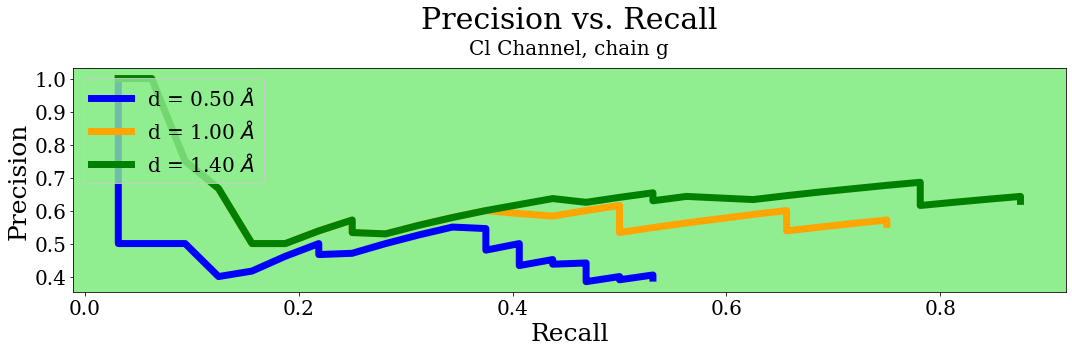

In [95]:
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
fig = plt.figure(figsize=[15,5])

if file_csv.iloc[0]['Water'] == '21':
    chan = 'Cl'
    plt.rcParams['axes.facecolor'] = 'lightgreen'
elif file_csv.iloc[0]['Water'] == '19':
    chan = 'O4'
    plt.rcParams['axes.facecolor'] = 'lightblue'
else:
    chan = 'O1'
    plt.rcParams['axes.facecolor'] = 'lightpink'

font=20
plt.plot(all_pr[0].recall, all_pr[0].precision, color ='b',  linewidth=7,label = "d = %0.2f $\AA$ " %distances[0])
plt.plot(all_pr[1].recall, all_pr[1].precision, color = 'orange',  linewidth=7, label = "d = %0.2f $\AA$" %distances[1])
plt.plot(all_pr[2].recall, all_pr[2].precision, color ='green',  linewidth=7, label = "d = %0.2f $\AA$"%distances[2] )

plt.legend(loc=2, prop={'size': font})

plt.title('Precision vs. Recall', fontsize=30,pad=40)
plt.suptitle('%s Channel, chain %s' %(chan,chain),fontsize=20, y=0.88, x = 0.53)
plt.xlabel('Recall', fontsize=25)
plt.ylabel('Precision',  fontsize=25)
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
plt.tight_layout()

if chain=='G':
    name = 'first'

else:
    name='second'

plt.savefig('pr_%s_%s_chain_plot.pdf' %(chan,name))

## Save dataframe to pickle! 

In [96]:

all_pr[0].to_pickle("precision_recall_%s_%s_chain_dist0.5.pkl" %(chan, name))
all_pr[1].to_pickle("precision_recall_%s_%s_chain_dist1.0.pkl" %(chan, name))
all_pr[2].to_pickle("precision_recall_%s_%s_chain_dist1.4.pkl" %(chan,name))

In [97]:
chain

'g'